<a href="https://colab.research.google.com/github/lerdeljan17/ML-Homework-1/blob/main/2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
!pip install tensorboardcolab

# **2A**

---



---



In [ ]:
#2a
%matplotlib inline
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

w =  [-0.77433] bias =  0.0011155168
w =  [-0.77837 -0.21494] bias =  0.21235296
w =  [ 0.11287 -0.15862 -0.33607] bias =  0.15618697
w =  [ 0.12182 -0.15246 -0.33885 -0.00549] bias =  0.1491905
w =  [ 0.04499 -0.17456 -0.29358  0.00543 -0.00543] bias =  0.15653029
w =  [-0.10508 -0.10566 -0.1581  -0.04744 -0.03492  0.00327] bias =  0.14759223


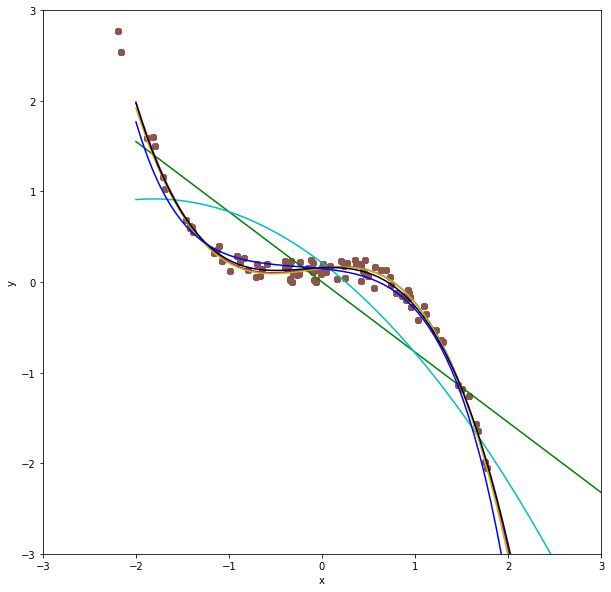

In [ ]:
# Pomocna funkcija koja od niza trening primera pravi feature matricu (m X n).
def create_feature_matrix(x, nb_features):
  tmp_features = []
  for deg in range(1, nb_features+1):
    tmp_features.append(np.power(x, deg))
  return np.column_stack(tmp_features)
avgLosses = dict()
plt.figure(figsize=(10, 10))
for nb_features in range(1,7):
  tf.reset_default_graph()

  # Izbegavamo scientific notaciju i zaokruzujemo na 5 decimala.
  np.set_printoptions(suppress=True, precision=5)

  # Korak 1: Učitavanje i obrada podataka.
  filename = '/content/drive/My Drive/ML/ml_d1_x_y_z/data/corona.csv'
  all_data = np.loadtxt(filename, delimiter=',', usecols=(0, 1))
  data = dict()
  data['x'] = all_data[:, 0]
  data['y'] = all_data[:, 1]

  # Nasumično mešanje.
  nb_samples = data['x'].shape[0]
  indices = np.random.permutation(nb_samples)
  data['x'] = data['x'][indices]
  data['y'] = data['y'][indices]

  # Normalizacija (obratiti pažnju na axis=0).
  data['x'] = (data['x'] - np.mean(data['x'], axis=0)) / np.std(data['x'], axis=0)
  data['y'] = (data['y'] - np.mean(data['y'])) / np.std(data['y'])

  data['x'] = create_feature_matrix(data['x'], nb_features)
  #print(data['x'][:3, :])

  # Iscrtavanje.
  plt.scatter(data['x'][:, 0], data['y'])
  plt.xlabel('x')
  plt.ylabel('y')

  # Korak 2: Model.
  # Primetiti 'None' u atributu shape placeholdera i -1 u 'tf.reshape'.
  X = tf.placeholder(shape=(None, nb_features), dtype=tf.float32)
  Y = tf.placeholder(shape=(None), dtype=tf.float32)
  w = tf.Variable(tf.zeros(nb_features))
  bias = tf.Variable(0.0)

  w_col = tf.reshape(w, (nb_features, 1))
  hyp = tf.add(tf.matmul(X, w_col), bias)

  # Korak 3: Funkcija troška i optimizacija.
  Y_col = tf.reshape(Y, (-1, 1))
  '''
  # Regularizacija
  lmbd = 0.01
  l2_reg = lmbd * tf.reduce_mean(tf.square(w))
  l1_reg = lmbd * tf.reduce_mean(tf.abs(w))
  '''
  mse = tf.reduce_mean(tf.square(hyp - Y_col))
  #loss = tf.add(mse, l2_reg)

  opt_op = tf.train.AdamOptimizer().minimize(mse)

  # Korak 4: Trening.
  with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    # Izvršavamo 100 epoha treninga.
    nb_epochs = 100
    for epoch in range(nb_epochs):
      
      # Stochastic Gradient Descent.
      epoch_loss = 0
      for sample in range(nb_samples):
        feed = {X: data['x'][sample].reshape((1, nb_features)), 
                Y: data['y'][sample]}
        _, curr_loss = sess.run([opt_op, mse], feed_dict=feed)
        epoch_loss += curr_loss
          
      epoch_loss /= nb_samples
      
      '''
      if (epoch + 1) % 100 == 0:
        print('Epoch: {}/{}| Avg loss: {:.5f}'.format(epoch+1, nb_epochs, 
                                                epoch_loss))
                                                '''
    avgLosses[nb_features] = epoch_loss
    # Ispisujemo i plotujemo finalnu vrednost parametara.
    w_val = sess.run(w)
    bias_val = sess.run(bias)
    print('w = ', w_val, 'bias = ', bias_val)
    xs = create_feature_matrix(np.linspace(-2, 4, 100), nb_features)
    hyp_val = sess.run(hyp, feed_dict={X: xs})  # Bez Y jer nije potrebno.
    colors  = ['g','c','m','y','k','b']
    plt.plot(xs[:, 0].tolist(), hyp_val.tolist(), color=colors[nb_features-1])
    plt.xlim([-3, 3])
    plt.ylim([-3, 3])
plt.show()

{1: 0.3991450863512364, 2: 0.32285938489940463, 3: 0.005905369399537222, 4: 0.006278034824035785, 5: 0.006763688745541003, 6: 0.05598270889005647}


Text(0, 0.5, 'loss')

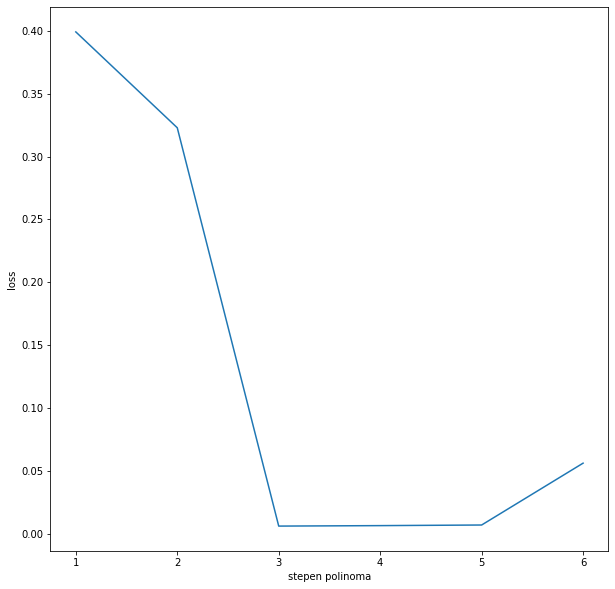

In [ ]:
print(avgLosses)
plt.figure(figsize=(10, 10))
x=[]
y=[]
for i in avgLosses.keys():
  x.append(i)
for i in avgLosses.values():
  y.append(i)
plt.plot(x,y)
plt.xlabel('stepen polinoma')
plt.ylabel('loss')
# avg loss opada sa povecanjem stepena
# ali je najmanji oko stepena 3 i 4

# **2B**

---



---



w =  [ 0.11455 -0.16187 -0.34126] bias =  0.1562415
w =  [ 0.10937 -0.15913 -0.33704] bias =  0.15417968
w =  [ 0.10731 -0.15691 -0.33474] bias =  0.15726596
w =  [ 0.09435 -0.1549  -0.33239] bias =  0.15592274
w =  [ 0.01746 -0.13481 -0.29958] bias =  0.1378334
w =  [-0.04523 -0.05972 -0.22459] bias =  0.05609051
w =  [-0.01433 -0.00868 -0.06574] bias =  0.008000838


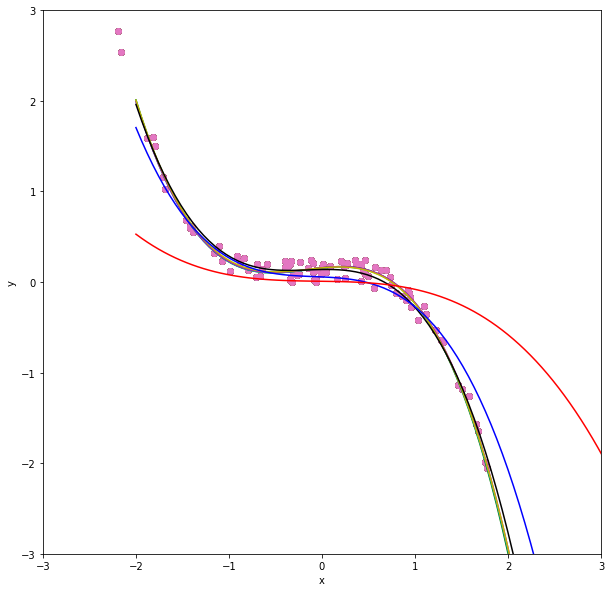

In [ ]:
#2B
# Pomocna funkcija koja od niza trening primera pravi feature matricu (m X n).
def create_feature_matrix(x, nb_features):
  tmp_features = []
  for deg in range(1, nb_features+1):
    tmp_features.append(np.power(x, deg))
  return np.column_stack(tmp_features)
avgLosses = {}
plt.figure(figsize=(10, 10))
for i,lmbd in enumerate([0,0.001,0.01,0.1,1,10,100]):
  tf.reset_default_graph()

  # Izbegavamo scientific notaciju i zaokruzujemo na 5 decimala.
  np.set_printoptions(suppress=True, precision=5)

  # Korak 1: Učitavanje i obrada podataka.
  filename = '/content/drive/My Drive/ML/ml_d1_x_y_z/data/corona.csv'
  all_data = np.loadtxt(filename, delimiter=',', usecols=(0, 1))
  data = dict()
  data['x'] = all_data[:, 0]
  data['y'] = all_data[:, 1]

  # Nasumično mešanje.
  nb_samples = data['x'].shape[0]
  indices = np.random.permutation(nb_samples)
  data['x'] = data['x'][indices]
  data['y'] = data['y'][indices]

  # Normalizacija (obratiti pažnju na axis=0).
  data['x'] = (data['x'] - np.mean(data['x'], axis=0)) / np.std(data['x'], axis=0)
  data['y'] = (data['y'] - np.mean(data['y'])) / np.std(data['y'])
  nb_features = 3
  data['x'] = create_feature_matrix(data['x'], nb_features)
  #print(data['x'][:3, :])

  # Iscrtavanje.
  plt.scatter(data['x'][:, 0], data['y'])
  plt.xlabel('x')
  plt.ylabel('y')

  # Korak 2: Model.
  # Primetiti 'None' u atributu shape placeholdera i -1 u 'tf.reshape'.
  X = tf.placeholder(shape=(None, nb_features), dtype=tf.float32,name='X')
  Y = tf.placeholder(shape=(None), dtype=tf.float32,name='Y')
  w = tf.Variable(tf.zeros(nb_features),name='W')
  bias = tf.Variable(0.0,name='bias')

  w_col = tf.reshape(w, (nb_features, 1))
  hyp = tf.add(tf.matmul(X, w_col), bias,name='hyp')

  # Korak 3: Funkcija troška i optimizacija.
  Y_col = tf.reshape(Y, (-1, 1))
  
  # Regularizacija
  #lmbd = 0.01
  l2_reg = lmbd * tf.reduce_mean(tf.square(w))
  l1_reg = lmbd * tf.reduce_mean(tf.abs(w))
  
  mse = tf.reduce_mean(tf.square(hyp - Y_col))
  loss = tf.add(mse, l2_reg,name='loss')

  opt_op = tf.train.AdamOptimizer().minimize(loss)
  # Korak 4: Trening.
  with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    # Izvršavamo 100 epoha treninga.
    nb_epochs = 100
    for epoch in range(nb_epochs):
      
      # Stochastic Gradient Descent.
      epoch_loss = 0
      for sample in range(nb_samples):
        feed = {X: data['x'][sample].reshape((1, nb_features)), 
                Y: data['y'][sample]}
        _, curr_loss = sess.run([opt_op, mse], feed_dict=feed)
        epoch_loss += curr_loss
          
      epoch_loss /= nb_samples
      
      '''
      if (epoch + 1) % 100 == 0:
        print('Epoch: {}/{}| Avg loss: {:.5f}'.format(epoch+1, nb_epochs, 
                                                epoch_loss))
                                                '''
    avgLosses[lmbd] = epoch_loss
    # Ispisujemo i plotujemo finalnu vrednost parametara.
    w_val = sess.run(w)
    bias_val = sess.run(bias)
    print('w = ', w_val, 'bias = ', bias_val)
    xs = create_feature_matrix(np.linspace(-2, 4, 100), nb_features)
    hyp_val = sess.run(hyp, feed_dict={X: xs})  # Bez Y jer nije potrebno.
    colors  = ['g','c','m','y','k','b','r']
    plt.plot(xs[:, 0].tolist(), hyp_val.tolist(), color=colors[i])
    plt.xlim([-3, 3])
    plt.ylim([-3, 3])
plt.show()

{0: 0.00601690008640162, 0.001: 0.005922429006727725, 0.01: 0.005868684364986621, 0.1: 0.006044914372541826, 1: 0.011359467065539093, 10: 0.09131593996997708, 100: 0.6103944231645241}


Text(0, 0.5, 'loss')

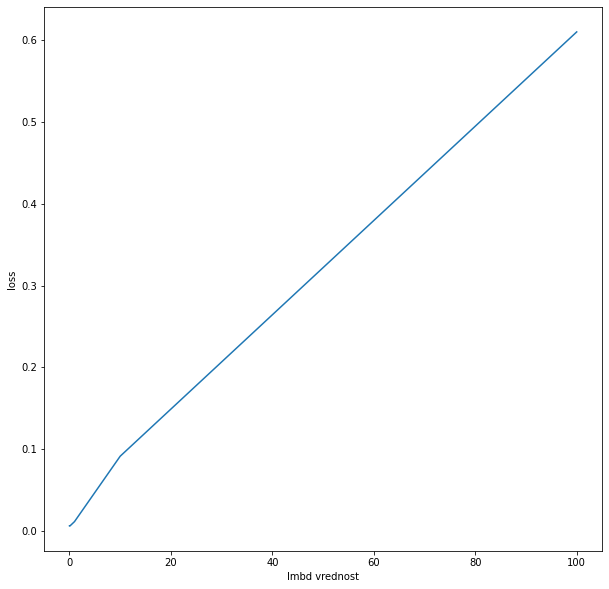

In [ ]:
print(avgLosses)
plt.figure(figsize=(10, 10))
x=[]
y=[]
for i in avgLosses.keys():
  x.append(i)
for i in avgLosses.values():
  y.append(i)
plt.plot(x,y)
plt.xlabel('lmbd vrednost')
plt.ylabel('loss')
# loss raste sa porastom lambda vrednosti

# **2C**

---



---



In [ ]:
  from tensorboardcolab import *
  # Ispisivanje log fajla za tensorboard.
  tbc = TensorBoardColab()
  writer = tbc.get_writer()
  writer.add_graph(tf.get_default_graph())
  writer.flush()

Using TensorFlow backend.


Wait for 8 seconds...
TensorBoard link:
https://a92e9be9.ngrok.io



In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs
%tensorboard --logdir='/content/Graph/events.out.tfevents.1586281644.3f187ee79abe'

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
Traceback (most recent call last):
  File "/tensorflow-1.15.2/python3.6/bin/tensorboard", line 8, in <module>
    sys.exit(run_main())
  File "/tensorflow-1.15.2/python3.6/tensorboard/main.py", line 64, in run_main
    app.run(tensorboard.main, flags_parser=tensorboard.configure)
  File "/usr/local/lib/python3.6/dist-packages/absl/app.py", line 299, in run
    _run_main(main, args)
  File "/usr/local/lib/python3.6/dist-packages/absl/app.py", line 250, in _run_main
    sys.exit(main(argv))
  File "/tensorflow-1.15.2/python3.6/tensorboard/program.py", line 220, in main
    server = self._make_server()
  File "/tensorflow-1.15.2/python3.6/tensorboard/program.py", line 301, in _make_server
    self.assets_zip_provider)
  File "/tensorflow-1.15.2/python3.6/tensorboard/backend/application.py", line 150, in standard_tensorboard_wsgi
    flags, plugin_loaders, data_provider, assets_zip_provider, multiplexer)
  File "/tens

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
Traceback (most recent call last):
  File "/tensorflow-1.15.2/python3.6/bin/tensorboard", line 8, in <module>
    sys.exit(run_main())
  File "/tensorflow-1.15.2/python3.6/tensorboard/main.py", line 64, in run_main
    app.run(tensorboard.main, flags_parser=tensorboard.configure)
  File "/usr/local/lib/python3.6/dist-packages/absl/app.py", line 299, in run
    _run_main(main, args)
  File "/usr/local/lib/python3.6/dist-packages/absl/app.py", line 250, in _run_main
    sys.exit(main(argv))
  File "/tensorflow-1.15.2/python3.6/tensorboard/program.py", line 220, in main
    server = self._make_server()
  File "/tensorflow-1.15.2/python3.6/tensorboard/program.py", line 301, in _make_server
    self.assets_zip_provider)
  File "/tensorflow-1.15.2/python3.6/tensorboard/backend/application.py", line 150, in standard_tensorboard_wsgi
    flags, plugin_loaders, data_provider, assets_zip_provider, multiplexer)
  File "/tens